In [1]:
#libs 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from scipy.stats import linregress

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
SP500 = pd.read_csv('S&P 500 Historical Data.csv') #read based on type 
# Date row = 0 (newest), while row = max (oldest), reverse order 
SP500 = SP500.iloc[::-1].reset_index(drop=True)
SP500

,Date,Price,Open,High,Low,Vol.,Change %
0,01/03/2000,"1,455.20","1,469.20","1,478.00","1,438.40",NaN,-0.95%
1,01/04/2000,"1,399.40","1,455.20","1,455.20","1,397.40",NaN,-3.83%
2,01/05/2000,"1,402.10","1,399.40","1,413.30","1,377.70",NaN,0.19%
3,01/06/2000,"1,403.50","1,402.10","1,411.90","1,392.00",NaN,0.10%
4,01/07/2000,"1,441.50","1,403.50","1,441.50","1,400.50",NaN,2.71%
...,...,...,...,...,...,...,...
4995,11/08/2019,"3,093.10","3,081.20","3,093.10","3,073.60",NaN,0.26%
4996,11/11/2019,"3,087.00","3,080.30","3,088.30","3,075.80",NaN,-0.20%
4997,11/12/2019,"3,091.80","3,089.30","3,102.60","3,084.70",NaN,0.16%
4998,11/13/2019,"3,094.00","3,084.20","3,098.10","3,078.80",NaN,0.07%


In [3]:
# Check for NaN 
print(SP500.notna().any())

# Vol. seems to contain NaN values) 
print(SP500["Vol."].max()) # if there is any data, max should return it, if its 0 or nan it means no data in here.
SP500 = SP500.drop("Vol.", axis=1)
SP500

Date         True
Price        True
Open         True
High         True
Low          True
Vol.        False
Change %     True
dtype: bool
nan


,Date,Price,Open,High,Low,Change %
0,01/03/2000,"1,455.20","1,469.20","1,478.00","1,438.40",-0.95%
1,01/04/2000,"1,399.40","1,455.20","1,455.20","1,397.40",-3.83%
2,01/05/2000,"1,402.10","1,399.40","1,413.30","1,377.70",0.19%
3,01/06/2000,"1,403.50","1,402.10","1,411.90","1,392.00",0.10%
4,01/07/2000,"1,441.50","1,403.50","1,441.50","1,400.50",2.71%
...,...,...,...,...,...,...
4995,11/08/2019,"3,093.10","3,081.20","3,093.10","3,073.60",0.26%
4996,11/11/2019,"3,087.00","3,080.30","3,088.30","3,075.80",-0.20%
4997,11/12/2019,"3,091.80","3,089.30","3,102.60","3,084.70",0.16%
4998,11/13/2019,"3,094.00","3,084.20","3,098.10","3,078.80",0.07%


In [4]:
# pretty up the data : 3,096.60 => 3096.60
# 0.25% => 0.25
cols_to_fix = ["Price", "Open", "High", "Low"]

for col in cols_to_fix:
    SP500[col] = SP500[col].str.replace(',', '', regex=False).astype(float)
    
SP500["Change %"] = SP500["Change %"].astype(str).str.rstrip('%').astype(float)
SP500

,Date,Price,Open,High,Low,Change %
0,01/03/2000,1455.2,1469.2,1478.0,1438.4,-0.95
1,01/04/2000,1399.4,1455.2,1455.2,1397.4,-3.83
2,01/05/2000,1402.1,1399.4,1413.3,1377.7,0.19
3,01/06/2000,1403.5,1402.1,1411.9,1392.0,0.10
4,01/07/2000,1441.5,1403.5,1441.5,1400.5,2.71
...,...,...,...,...,...,...
4995,11/08/2019,3093.1,3081.2,3093.1,3073.6,0.26
4996,11/11/2019,3087.0,3080.3,3088.3,3075.8,-0.20
4997,11/12/2019,3091.8,3089.3,3102.6,3084.7,0.16
4998,11/13/2019,3094.0,3084.2,3098.1,3078.8,0.07


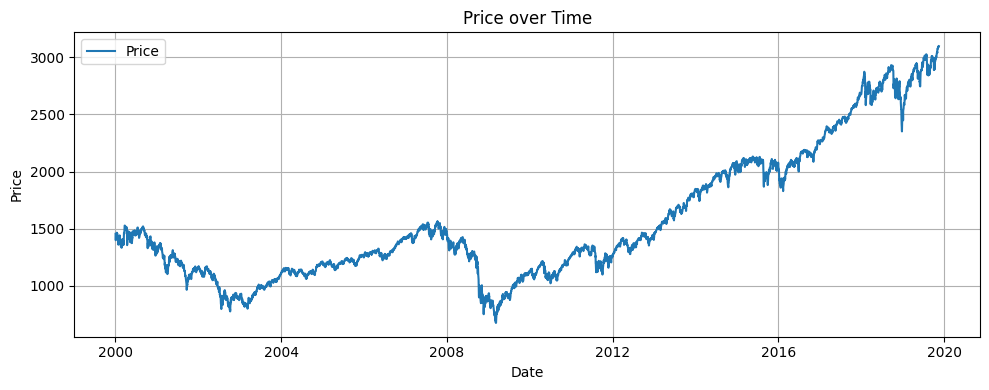

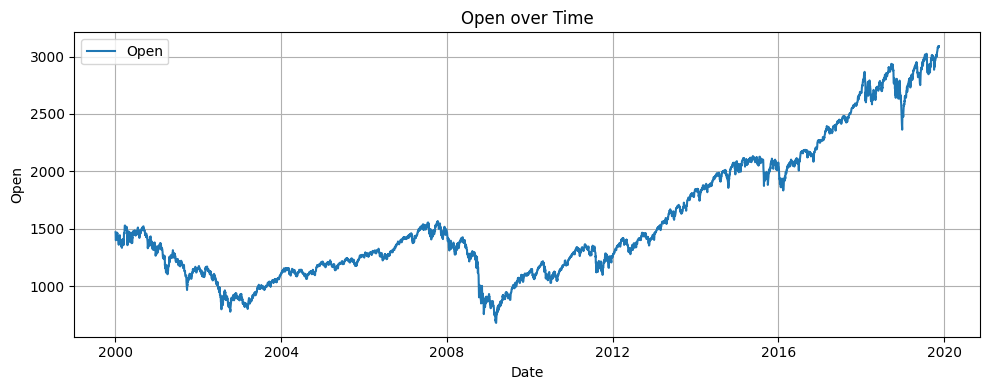

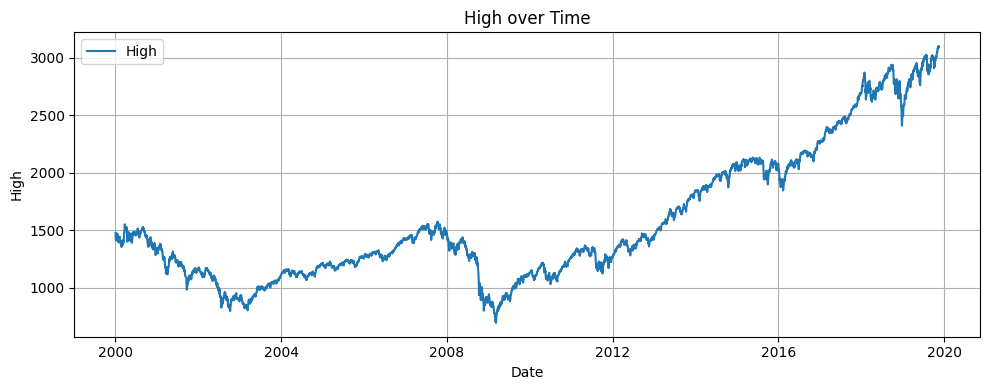

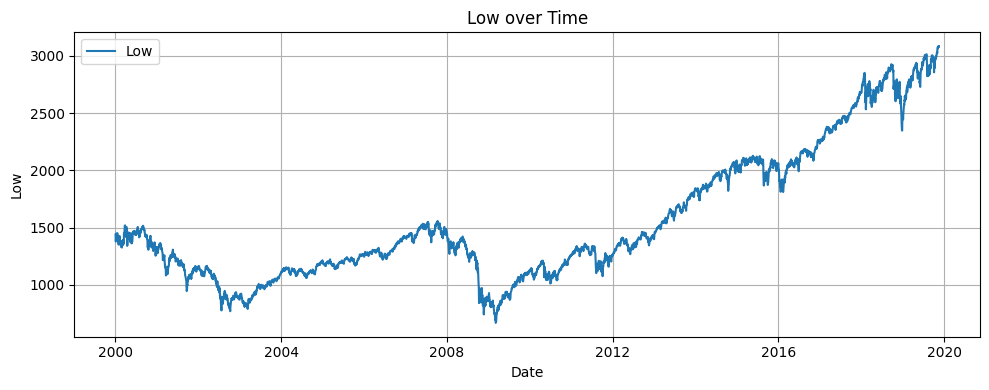

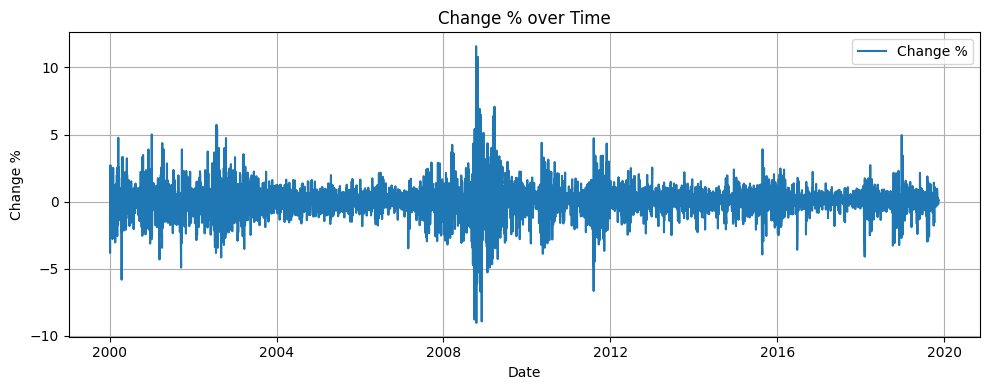

In [5]:
# Set Date as index if it's not already
SP500["Date"] = pd.to_datetime(SP500["Date"])
SP500.set_index("Date", inplace=True)

# List of columns to plot
y_columns = ["Price", "Open", "High", "Low", "Change %"]

# Plot each column
for col in y_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(SP500.index, SP500[col], label=col)
    plt.title(f"{col} over Time") #f"{col} => f strint of the variable col... i.e., Price Open etc.
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

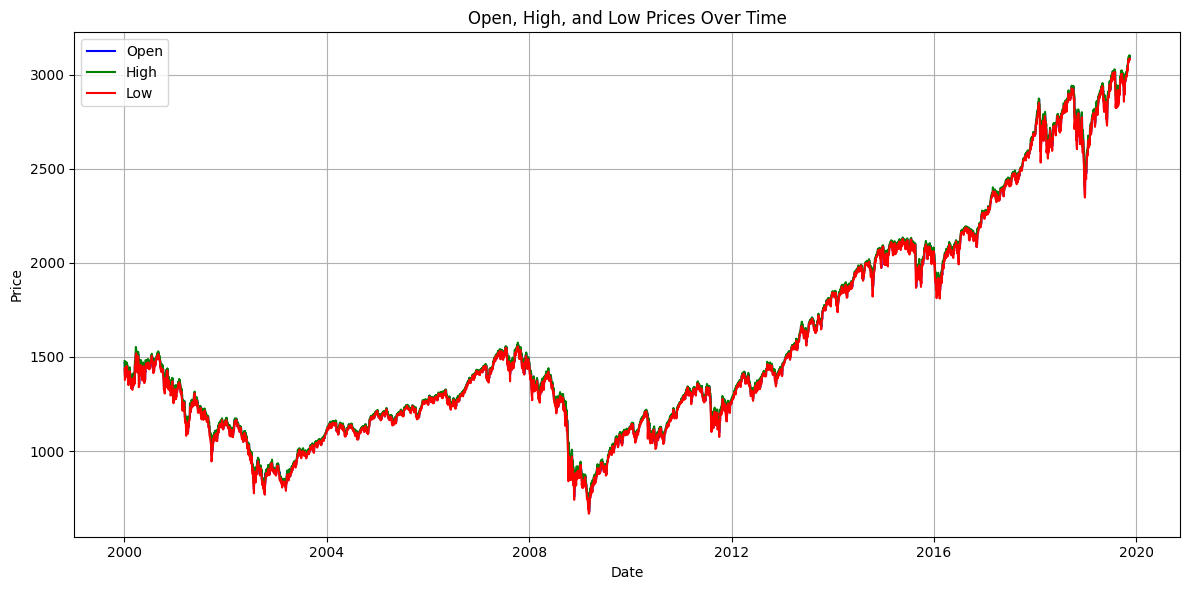

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(SP500.index, SP500["Open"], label="Open", color="blue")
plt.plot(SP500.index, SP500["High"], label="High", color="green")
plt.plot(SP500.index, SP500["Low"], label="Low", color="red")

plt.title("Open, High, and Low Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

fig = go.Figure()

# Add traces for Open, High, Low
fig.add_trace(go.Scatter(x=SP500.index, y=SP500["Open"], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=SP500.index, y=SP500["High"], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=SP500.index, y=SP500["Low"], mode='lines', name='Low'))

fig.update_layout(
    title="Open, High, Low Prices Over Time",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode="x unified"
)

fig.show()